In [37]:
# Importação das bibliotecas
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

from sklearn.preprocessing import (
    StandardScaler,
    OneHotEncoder,
    MinMaxScaler,
    PowerTransformer
)
from sklearn.compose import ColumnTransformer


from src.config import DADOS_TRATADOS
from src.utils import inspect_outliers

In [27]:
# Obtendo os dados como DataFrame
df = pd.read_parquet(DADOS_TRATADOS)
df.head()

,Education,Marital_Status,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,...,YearsSinceEnrolled,Age,MntTotal,MntRegularProds,Children,hasChildren,AcceptedCmpTotal,HasAcceptedCmp,NumPurchasesTotal,AgeGroup
0,Graduation,Single,58138.0,0,0,58,635,88,546,172,...,1,57,1617,1529,0,0,0,0,22,46-60
1,Graduation,Single,46344.0,1,1,38,11,1,6,2,...,0,60,27,21,2,1,0,0,4,46-60
2,Graduation,Partner,71613.0,0,0,26,426,49,127,111,...,0,49,776,734,0,0,0,0,20,46-60
3,Graduation,Partner,26646.0,1,0,26,11,4,20,10,...,0,30,53,48,1,1,0,0,6,18-30
4,PhD,Partner,58293.0,1,0,94,173,43,118,46,...,0,33,422,407,1,1,0,0,14,31-45


In [28]:
# Obtendo as colunas numéricas da base
numeric_columns = df.select_dtypes("number").columns
len(numeric_columns)

32

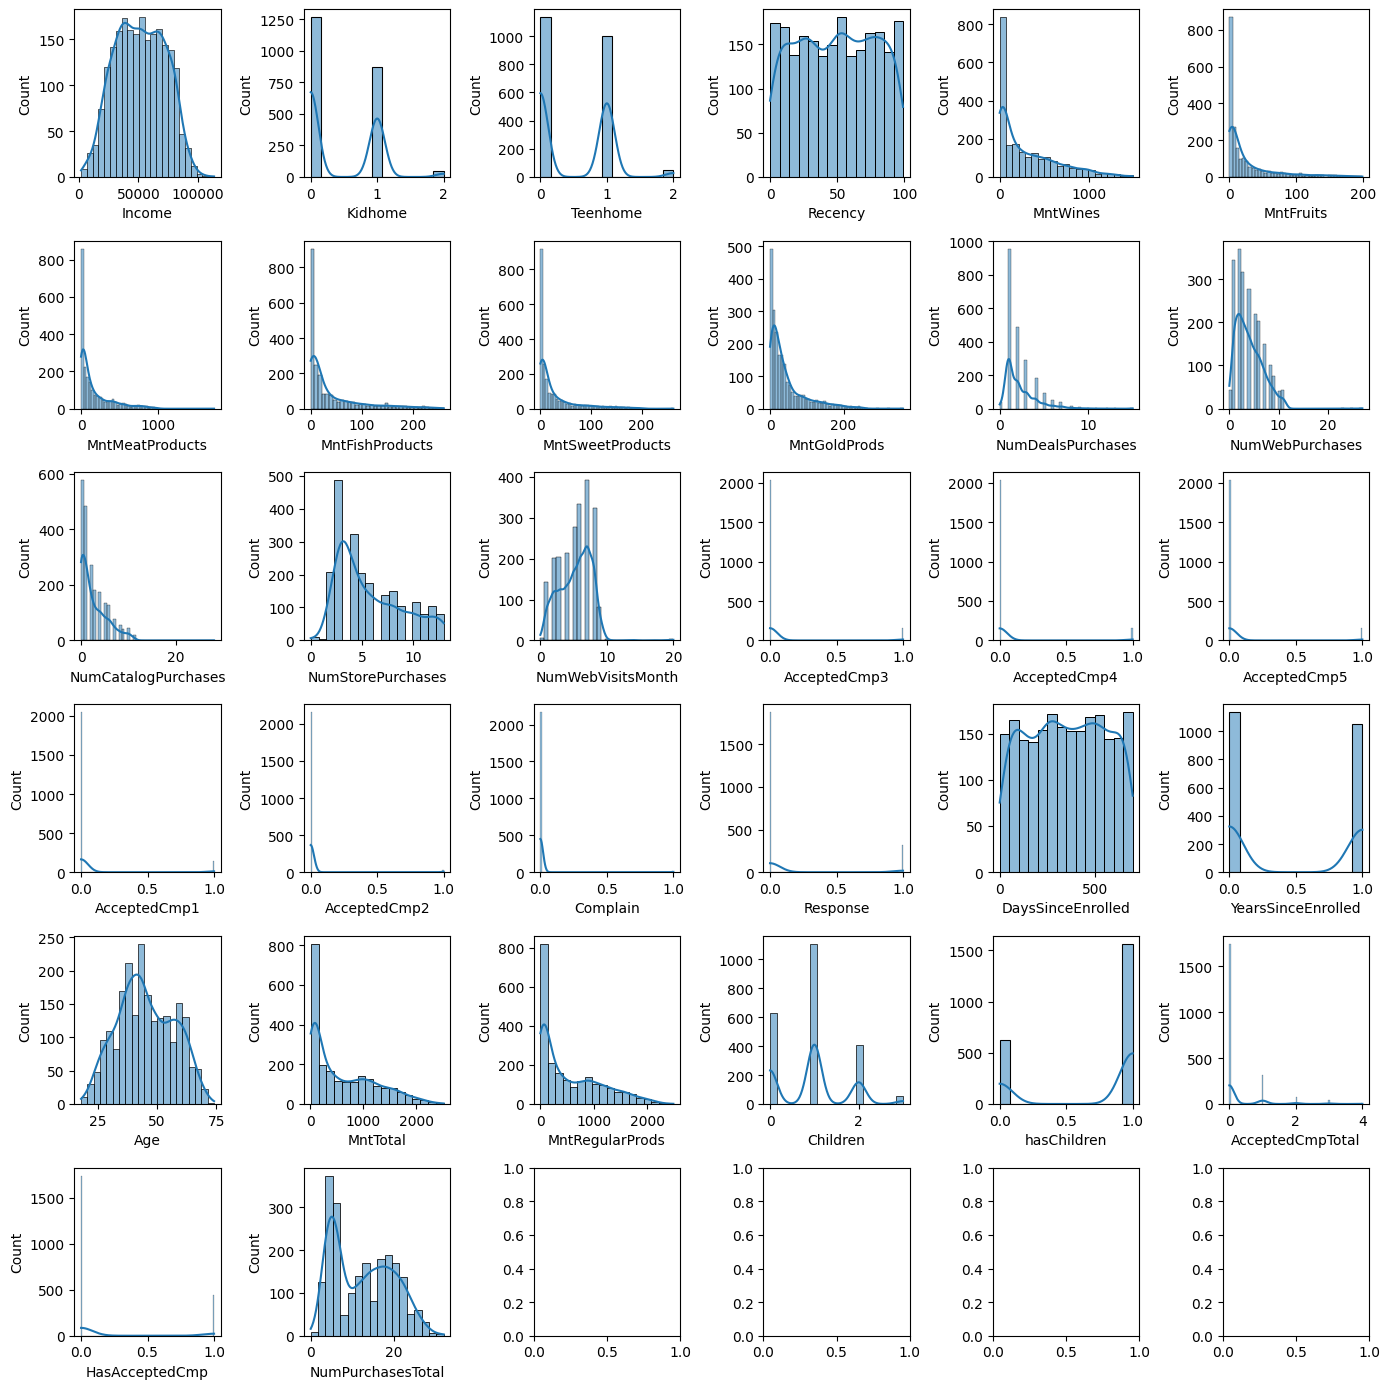

In [29]:
# Histograma e kde das colunas numéricas

fig, axs = plt.subplots(6, 6, figsize=(14, 14))

for ax, column in zip(axs.flatten(), numeric_columns):

    sns.histplot(
        df,
        x=column,
        kde=True,
        ax=ax,
    )

plt.tight_layout()
plt.show()

In [30]:
inspect_outliers(df, "Income")

,Education,Marital_Status,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,...,YearsSinceEnrolled,Age,MntTotal,MntRegularProds,Children,hasChildren,AcceptedCmpTotal,HasAcceptedCmp,NumPurchasesTotal,AgeGroup


In [34]:
# Definindo a transformação de cada coluna

min_max_columns = [
    "Recency",
    "DaysSinceEnrolled",
]

std_columns = [
    "Income",
    "Age",
]

power_columns = df.columns[
    df.columns.str.startswith("Mnt") |
    df.columns.str.startswith("Num")
].tolist()

one_hot_columns = df.columns.difference(
    min_max_columns + std_columns + power_columns
).tolist()

In [38]:
# Definição do pré-processamento das colunas
preprocessing = ColumnTransformer(
    [
        ("ohe", OneHotEncoder(drop="first"), one_hot_columns),
        ("std", StandardScaler(), std_columns),
        ("min_max", MinMaxScaler(), min_max_columns),
        ("power", PowerTransformer(), power_columns),
    ]
)

In [39]:
# Obtendo os dados transformados como DataFrame

X_scaled = preprocessing.fit_transform(df)

df_scaled = pd.DataFrame(
    X_scaled,
    columns=preprocessing.get_feature_names_out(),
)
df_scaled.head()

,ohe__AcceptedCmp1_1,ohe__AcceptedCmp2_1,ohe__AcceptedCmp3_1,ohe__AcceptedCmp4_1,ohe__AcceptedCmp5_1,ohe__AcceptedCmpTotal_1,ohe__AcceptedCmpTotal_2,ohe__AcceptedCmpTotal_3,ohe__AcceptedCmpTotal_4,ohe__AgeGroup_31-45,...,power__MntSweetProducts,power__MntGoldProds,power__NumDealsPurchases,power__NumWebPurchases,power__NumCatalogPurchases,power__NumStorePurchases,power__NumWebVisitsMonth,power__MntTotal,power__MntRegularProds,power__NumPurchasesTotal
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.385671,1.095329,0.763339,1.324949,1.747466,-0.426681,0.708430,1.318537,1.313551,1.222632
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-0.983693,-0.941155,0.170827,-1.375456,-0.374301,-1.467666,-0.100233,-1.445123,-1.453583,-1.314355
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.540467,0.450302,-0.825676,1.324949,0.160196,1.242157,-0.519744,0.661522,0.690689,1.027060
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-0.533240,-1.046390,0.170827,-0.718175,-1.334371,-0.426681,0.308572,-1.120903,-1.065185,-0.873288
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.688527,-0.343609,1.464404,0.523281,0.527789,0.276123,-0.100233,0.178009,0.241298,0.359351


In [40]:
# Pegando apenas as colunas que não passaram por one-hot
not_ohe_columns = df_scaled.columns[
    ~(df_scaled.columns.str.startswith("ohe"))
].tolist()
len(not_ohe_columns)

18

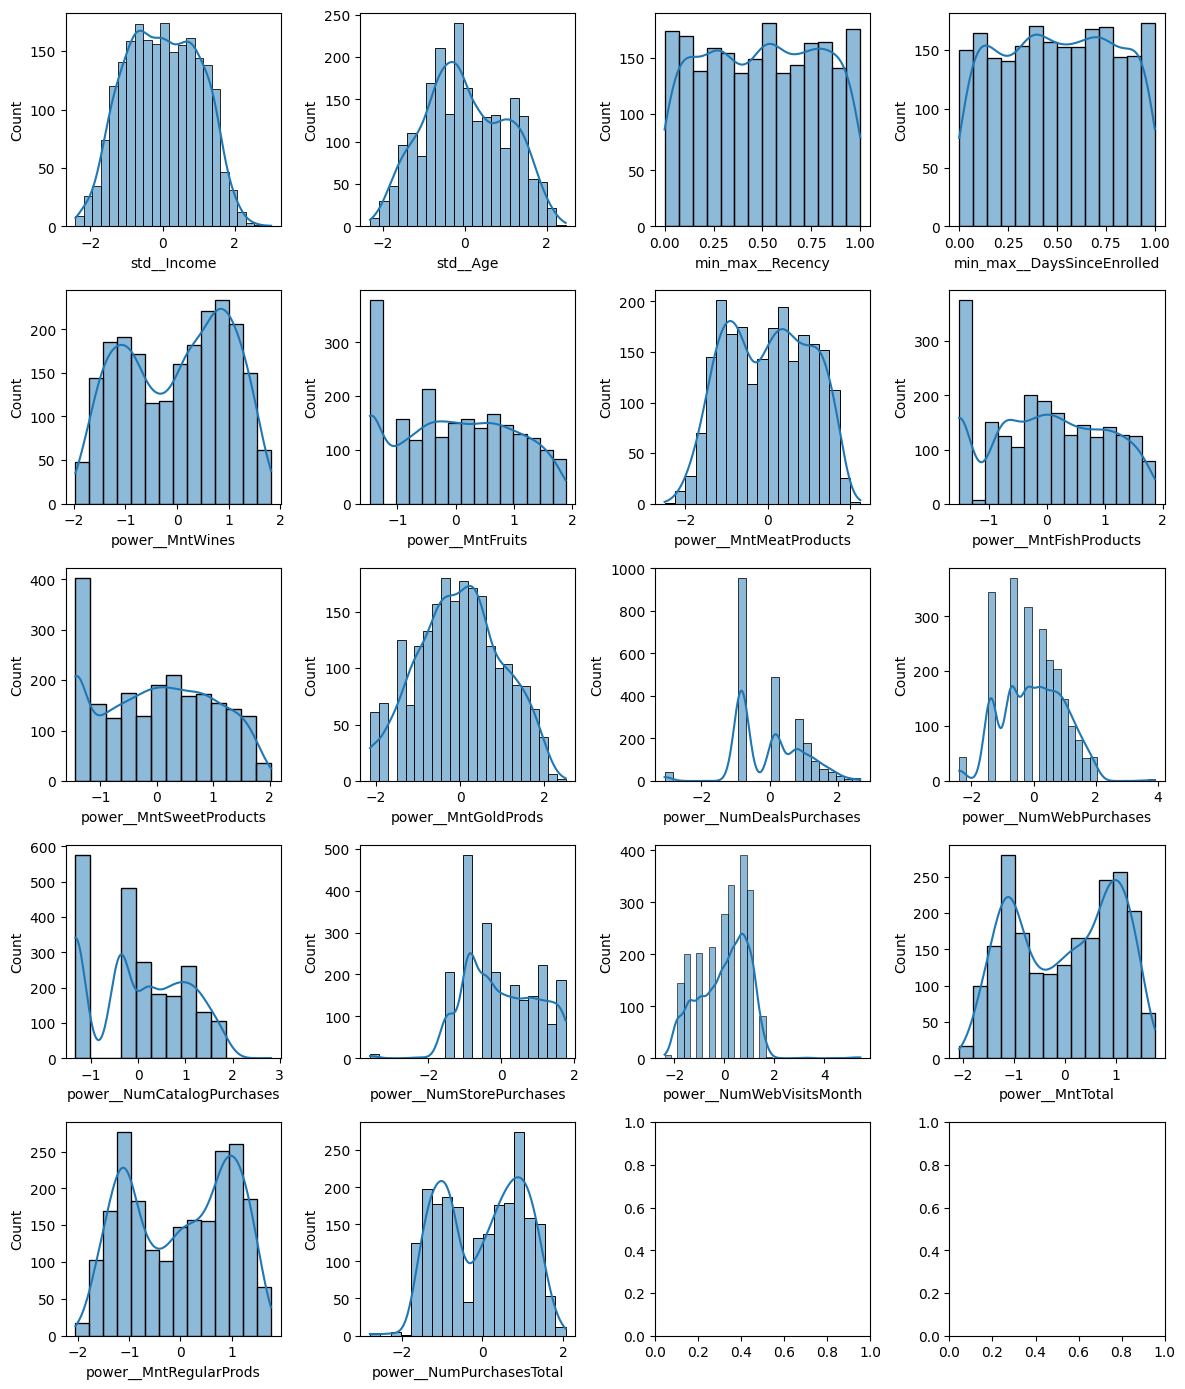

In [41]:
# Histograma das colunas transformadas

fig, axs = plt.subplots(5, 4, figsize=(12, 14))

for ax, column in zip(axs.flatten(), not_ohe_columns):

    sns.histplot(
        df_scaled,
        x=column,
        kde=True,
        ax=ax,
    )

plt.tight_layout()
plt.show()